<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 03
## Clase 02: Visualización Imperativa

## Objetivos

* Comprender el estilo de visualización imperativa.
* Aplicar gráficos adecuados dependiendo de los datos.

## Contenidos
* [Visualización Imperativa](#imperative)
* [Matplotlib](#matplotlib)
* [Gráfico a Gráfico](#plot-plot)

<a id='imperative'></a>
## Visualización Imperativa

Challachalla

<a id='matplotlib'></a>
## Matplotlib

Challa y hablar de fig, subplots, axes, axis

<a id='plot-plot'></a>
## Gráfico a Gráfico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import multivariate_normal

%matplotlib inline

### Gráfico de Barras

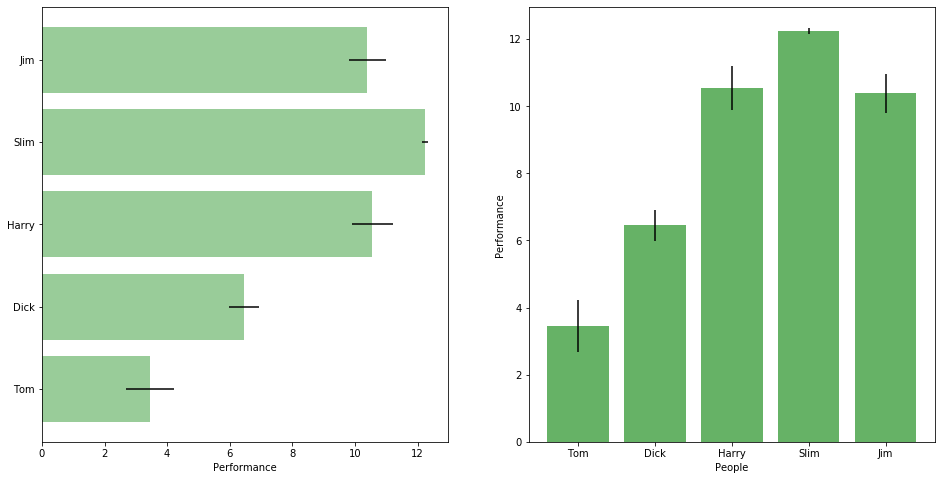

In [2]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# Another way without axes
fig = plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.barh(y_pos, performance, xerr=error, align='center', color="g", alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')

plt.subplot(1,2,2)
plt.bar(y_pos, performance, yerr=error, align='center', color="g", alpha=0.6)
plt.xticks(y_pos, people)
plt.xlabel('People')
plt.ylabel('Performance')

plt.show()

### ¿Cuándo utilizar gráfico de barras?
* x: Debe ser datos del tipo nominal o ordinal.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

Evitar: gráfico de nominal vs nominal.

### Campos de Vectores

¿Porqué se llama quiver al campo de vectores en inglés? 

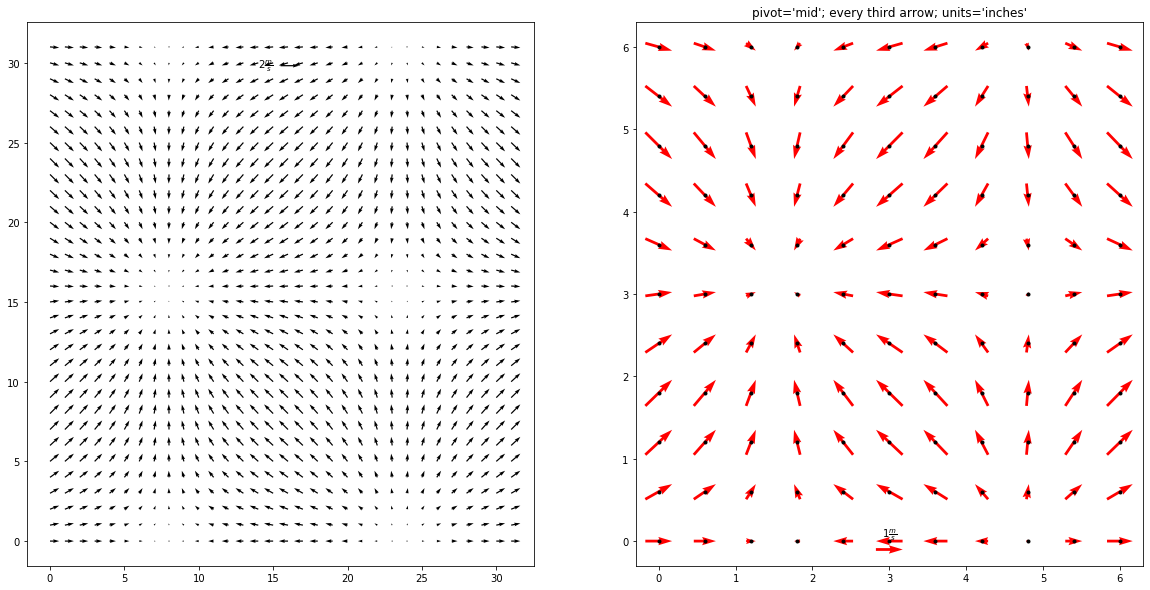

In [3]:
def my_vector_field():
    """
    You can even define a new function.
    """
    X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
    U = np.cos(X)
    V = np.sin(Y)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

    Q1 = ax1.quiver(U, V)
    qk1 = ax1.quiverkey(
        Q1,
        0.5,
        0.92,
        2,
        r'$2 \frac{m}{s}$',
        labelpos='W',
        fontproperties={'weight': 'bold'}
    )
    
    Q2 = ax2.quiver(
        X[::3, ::3],
        Y[::3, ::3],
        U[::3, ::3],
        V[::3, ::3],
        pivot='mid',
        color='r',
        units='inches'
    )
    qk2 = ax2.quiverkey(
        Q2,
        0.5,
        0.03,
        1,
        r'$1 \frac{m}{s}$',
        fontproperties={'weight': 'bold'}
    )
    ax2.plot(X[::3, ::3], Y[::3, ::3], 'k.')
    ax2.set_title("pivot='mid'; every third arrow; units='inches'")
    
    fig.show()

my_vector_field()

#### ¿Cuándo utilizar campos de vectores?

* x: Debe ser datos del tipo posicional o cuantitativo.
* y: Debe ser datos de tipo posicional o cuantitativo. 
* z: Pendiente debe ser dato de tipo posicional o cuantitativo.

Evitar: gráfico de campo de vectores si no es posible la interpretación correspondiente.

### Countor Plot

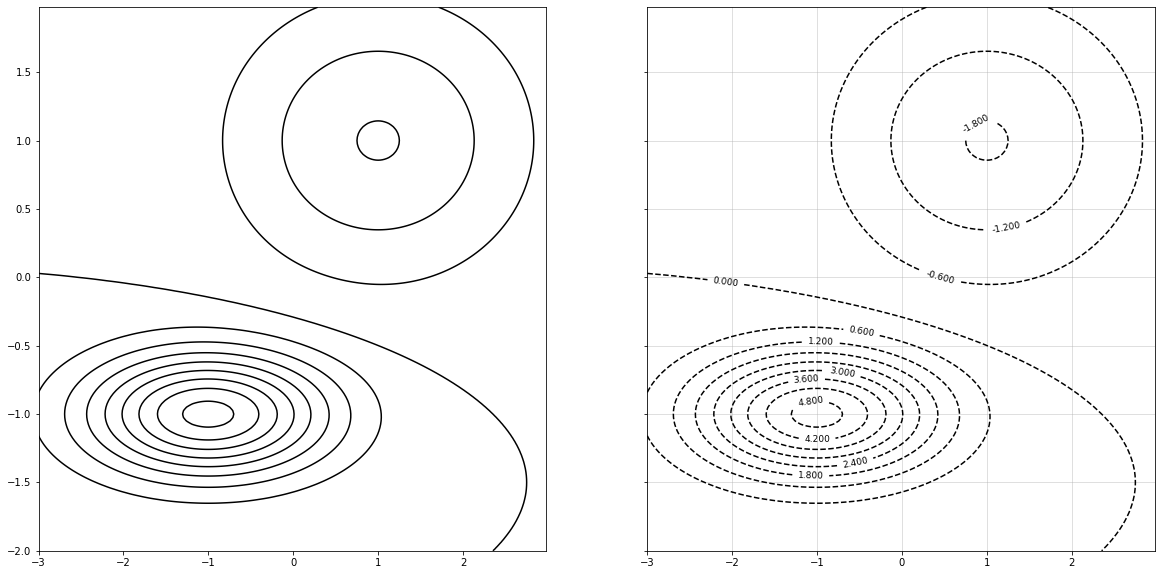

In [4]:
x, y = np.mgrid[-3:3:.025, -2:2:.025]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
z1 = multivariate_normal.pdf(
    pos,
    mean=[-1.0, -1.0],
    cov=[[1.0, 0.0], [0.0, 0.1]]
)
z2 = multivariate_normal.pdf(
    pos, 
    mean=[1.0, 1.0],
    cov=[[1.5, 0.0], [0.0, 0.5]]
)
z = 10 * (z1 - z2)

fig, axs = plt.subplots(ncols=2, figsize=(20, 10), sharex=True, sharey=True)
cmaps = [cm.rainbow, cm.autumn, cm.coolwarm, cm.gray]
countour_styles = [
    {"colors": "k", "linestyles": "solid"},
    {"colors": "k", "linestyles": "dashed"},
]

for i, ax in zip(range(len(cmaps)), axs.ravel()):
    cs = ax.contour(x, y, z, 11, **countour_styles[i])
    if i > 0:
        ax.clabel(cs, fontsize=9, inline=1)
        ax.grid(alpha=0.5)
fig.show()

#### ¿Cuándo se debe utiliar countour plot?

* x: Dato del tipo posicional o cuantitativo.
* y: Dato de tipo posicional o cuantitativo. 
* z: Dato de tipo posicional o cuantitativo.

***OBSERVACION***: Se debe tener suficiente densidad/regularidad de puntos como para poder obtener superficies de nivel.

### Scatter Plot

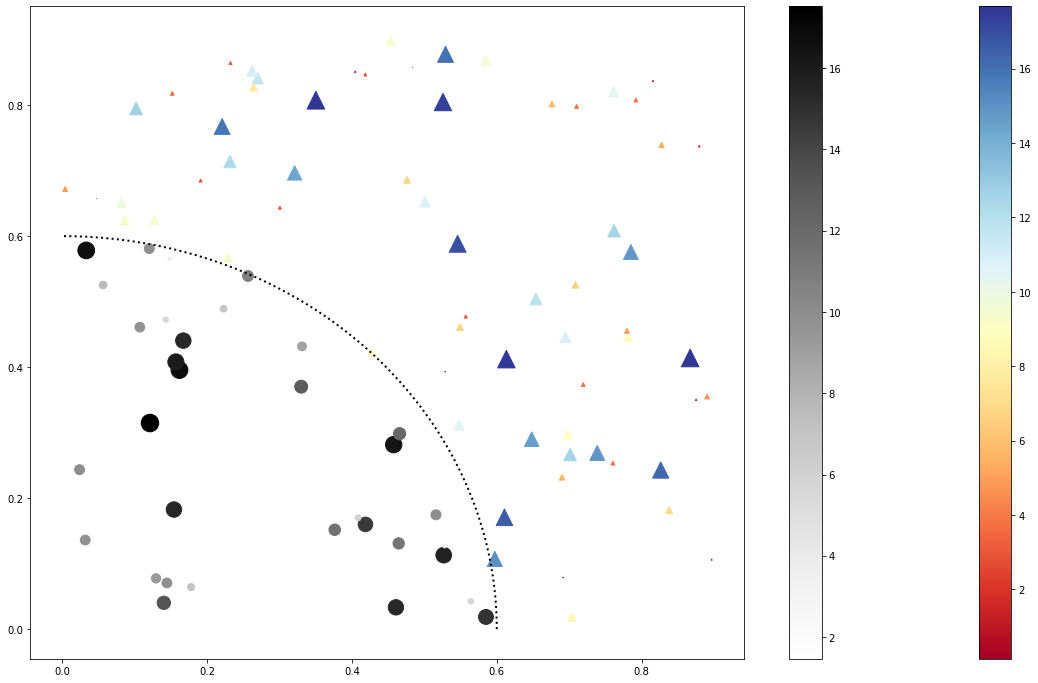

In [5]:
N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = np.pi * (10 * np.random.rand(N)) ** 2  # 0 to 10 point radiuses
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
cm1 = plt.cm.get_cmap('RdYlBu')
cm2 = plt.cm.get_cmap('Greys')

plt.figure(figsize=(20, 12))
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
sc1 = plt.scatter(x, y, s=area1, marker='^', c=c, cmap=cm1)
plt.colorbar(sc1)
sc2 = plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cm2)
plt.colorbar(sc2)

# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta), "k:", lw=2.0)

plt.show()

### ¿Cuándo utilizar scatter plot?
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo nominal u ordinal (opcional) 

***OBSERVACION***: Si hay pocos puntos, también puede usarse para z datos de tipo posicional o cuantitativo.


### Gráfico de Barra de Error

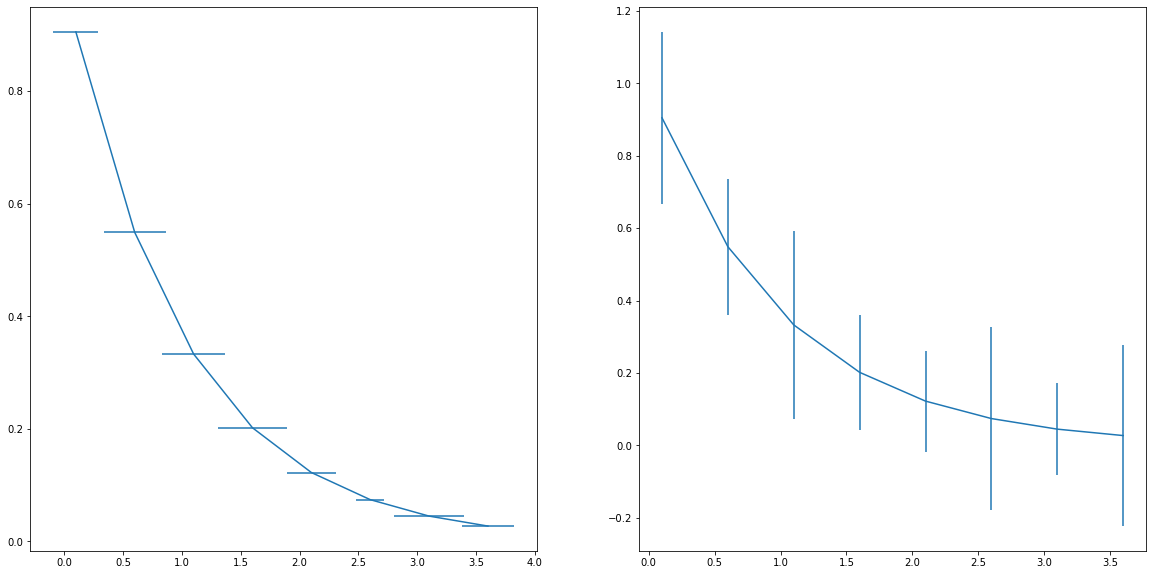

In [6]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

x_error = 0.1 + 0.2*np.random.rand(len(x))
ax1.errorbar(x, y, xerr=x_error)

y_error = 0.1 + 0.2*np.random.rand(len(x))
ax2.errorbar(x, y, yerr=y_error)

fig.show()

#### ¿Cuándo utilizar gráfico de barra de error?
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo posicional o cuantitativo.
Los valores de z tienen que tener las mismas unidades y.